In [115]:
#21BAI1778
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #cyclic learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix


I.	Read the dataset and identify the columns and their datatype

In [116]:
#21BAI1778
df = pd.read_csv('set1data.csv')
df

,Unnamed: 0,id,age,salary,bought TV
0,0,1,51,8241.0,1
1,1,2,33,68076.0,0
2,2,3,41,7876.0,0
3,3,4,60,94066.0,1
4,4,5,58,37654.0,0
...,...,...,...,...,...
395,395,396,50,61700.0,1
396,396,397,45,2630.0,1
397,397,398,53,68894.0,1
398,398,399,NaN,16818.0,0


In [117]:
df = df.rename(columns={'Unnamed: 0':'sr'})
df

,sr,id,age,salary,bought TV
0,0,1,51,8241.0,1
1,1,2,33,68076.0,0
2,2,3,41,7876.0,0
3,3,4,60,94066.0,1
4,4,5,58,37654.0,0
...,...,...,...,...,...
395,395,396,50,61700.0,1
396,396,397,45,2630.0,1
397,397,398,53,68894.0,1
398,398,399,NaN,16818.0,0


IV.	Identify any null values or other issues in “age” and “salary” column, do some prepressing. [Don’t remove the rows] ( 2 Marks )

In [118]:
#21BAI1778
df.isnull().sum()

sr           0
id           0
age          4
salary       4
bought TV    0
dtype: int64

In [119]:
#21BAI1778
df['age'] = df['age'].fillna(df['age'].mode)[0]
df

,sr,id,age,salary,bought TV
0,0,1,51,8241.0,1
1,1,2,51,68076.0,0
2,2,3,51,7876.0,0
3,3,4,51,94066.0,1
4,4,5,51,37654.0,0
...,...,...,...,...,...
395,395,396,51,61700.0,1
396,396,397,51,2630.0,1
397,397,398,51,68894.0,1
398,398,399,51,16818.0,0


In [120]:
#21BAI1778
df['salary'] = df['salary'].fillna(df['salary'].mode)[0]
df

,sr,id,age,salary,bought TV
0,0,1,51,8241.0,1
1,1,2,51,8241.0,0
2,2,3,51,8241.0,0
3,3,4,51,8241.0,1
4,4,5,51,8241.0,0
...,...,...,...,...,...
395,395,396,51,8241.0,1
396,396,397,51,8241.0,1
397,397,398,51,8241.0,1
398,398,399,51,8241.0,0


In [121]:
#21BAI1778
df.isnull().sum()

sr           0
id           0
age          0
salary       0
bought TV    0
dtype: int64

II.	Describe the given dataset.



In [122]:
from pandas.core import describe
#21BAI1778
df.describe()

,sr,id,salary,bought TV
count,400.000000,400.000000,400.0,400.000000
mean,199.500000,200.500000,8241.0,0.275000
std,115.614301,115.614301,0.0,0.447073
min,0.000000,1.000000,8241.0,0.000000
25%,99.750000,100.750000,8241.0,0.000000
50%,199.500000,200.500000,8241.0,0.000000
75%,299.250000,300.250000,8241.0,1.000000
max,399.000000,400.000000,8241.0,1.000000


In [123]:
#21BAI1778
df.describe

<bound method NDFrame.describe of       sr   id age  salary  bought TV
0      0    1  51  8241.0          1
1      1    2  51  8241.0          0
2      2    3  51  8241.0          0
3      3    4  51  8241.0          1
4      4    5  51  8241.0          0
..   ...  ...  ..     ...        ...
395  395  396  51  8241.0          1
396  396  397  51  8241.0          1
397  397  398  51  8241.0          1
398  398  399  51  8241.0          0
399  399  400  51  8241.0          1

[400 rows x 5 columns]>

III.	Draw the bar chart to display how many of them bought the TV or not from the data set. ( 2 Marks )



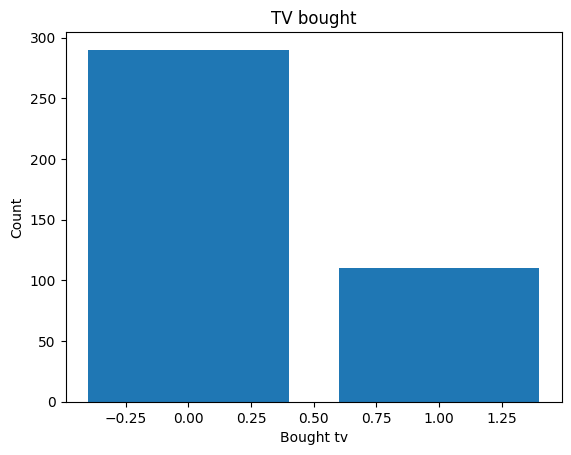

In [124]:
#21BAI1778
class_counts = df['bought TV'].value_counts()
plt.bar(class_counts.index, class_counts)
plt.xlabel('Bought tv')
plt.ylabel('Count')
plt.title('TV bought')
plt.show()

V.	Check whether any scaling is required or not? If yes do some scaling.  ( 1 Mark )
a.	Try the model without scaling and with scaling also in Question no. VII


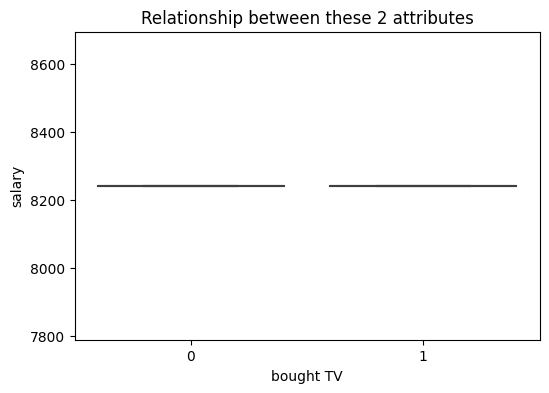

In [125]:
#21BAI1778
plt.figure(figsize=(6, 4))
sns.boxplot(x='bought TV', y='salary', data=df)
plt.xlabel('bought TV')
plt.ylabel('salary')
plt.title('Relationship between these 2 attributes')
plt.show()

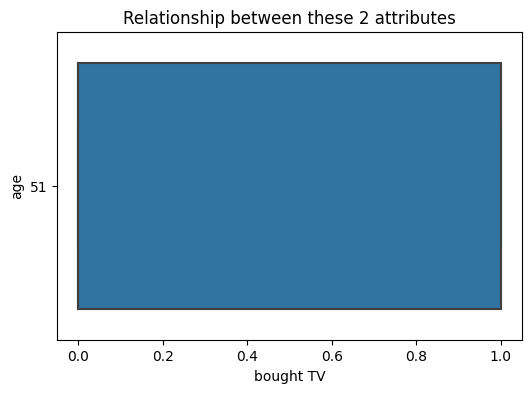

In [126]:
#21BAI1778
plt.figure(figsize=(6, 4))
sns.boxplot(x='bought TV', y='age', data=df)
plt.xlabel('bought TV')
plt.ylabel('age')
plt.title('Relationship between these 2 attributes')
plt.show()

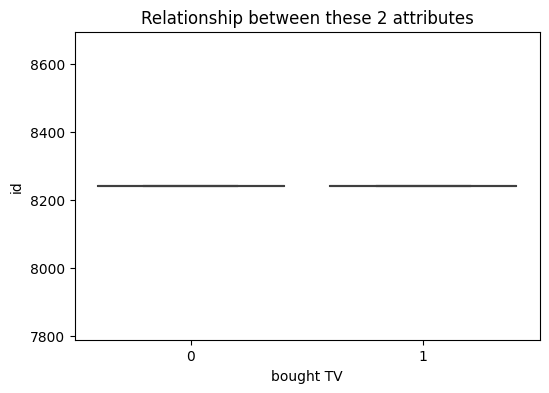

In [137]:
#21BAI1778
plt.figure(figsize=(6, 4))
sns.boxplot(x='bought TV', y='salary', data=df)
plt.xlabel('bought TV')
plt.ylabel('id')
plt.title('Relationship between these 2 attributes')
plt.show()

VI.	After pre-processing split the data into Train and Test set ( 1 Mark )

In [128]:
x = df.drop('bought TV', axis=1)  # Features (input variables)
y = df['bought TV']  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


VII.	Identify the suitable problem statement and apply the corresponding machine learning techniques and display the performance metrics in the form of chart. ( 9 Marks )

Statement: using from the given attributes find the classification.

In [129]:
#21BAI1778
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

# K-nearest neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

logreg_predictions = logreg_model.predict(x_test)
knn_predictions = knn_model.predict(x_test)

#Evaluating the model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print('Logistic Regression Accuracy:', logreg_accuracy*100)
print('KNN Accuracy:', knn_accuracy*100)



Logistic Regression Accuracy: 66.25
KNN Accuracy: 66.25
